Stats
Number of rows:  31500
         PowerLimit          Size          Cost       Package          Core   
count  31500.000000  31500.000000  31500.000000  31500.000000  31500.000000  \
mean     217.000000   2833.333333    624.571429      1.244394      1.109950   
std      391.817398   1649.942013    232.566857      3.346708      3.081797   
min        5.000000   1000.000000    237.000000      0.018982      0.012451   
25%       10.000000   1000.000000    444.000000      0.067307      0.043152   
50%       20.000000   2500.000000    596.500000      0.312195      0.254730   
75%       50.000000   5000.000000    775.000000      0.748916      0.657852   
max     1000.000000   5000.000000   1285.000000     25.059814     23.374634   

                GPU     DRAM          Time   Temperature         Memory  
count  31500.000000  31500.0  31500.000000  31500.000000   31500.000000  
mean       0.000660      0.0    127.534540     44.459857   19269.177778  
std        0.004683      0.0    285.2

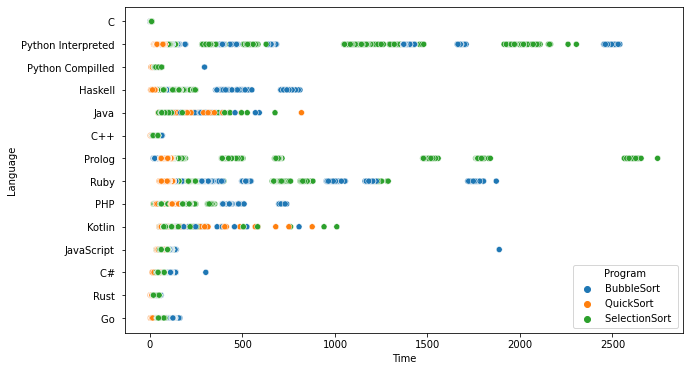

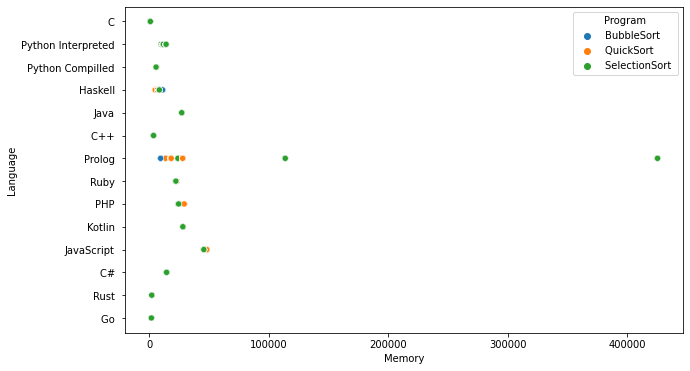

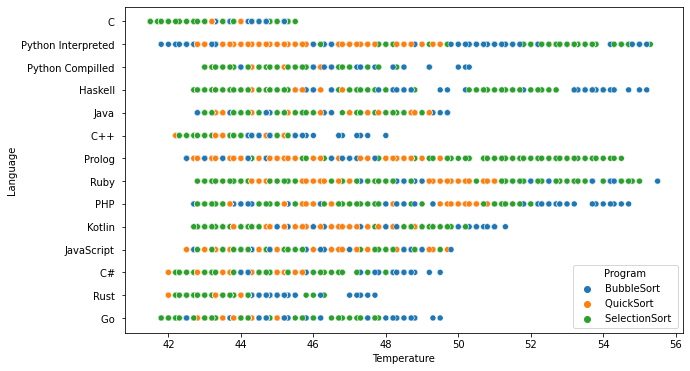

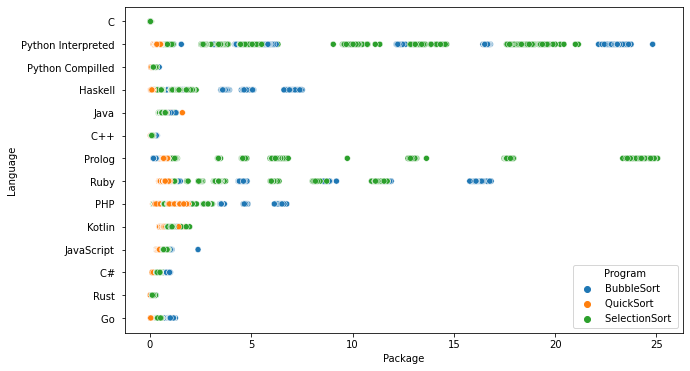

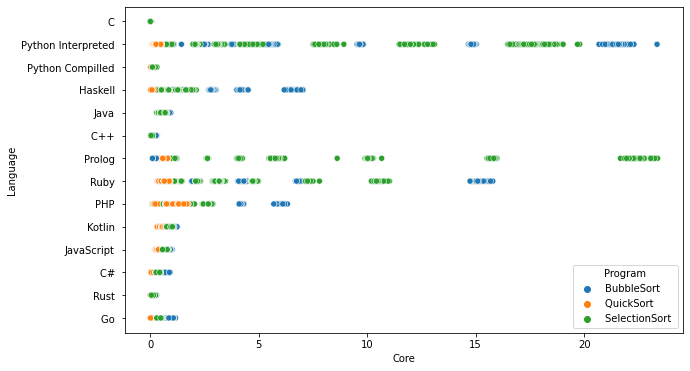

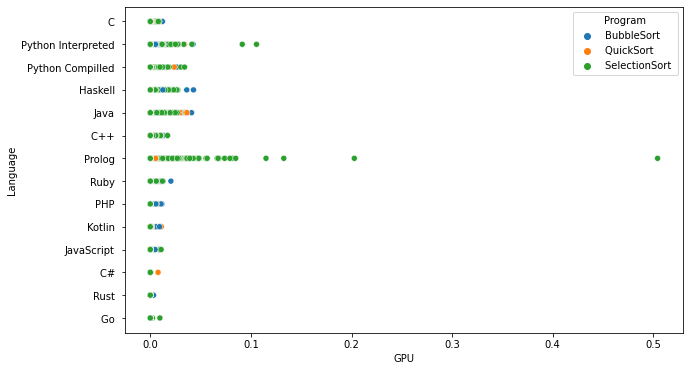

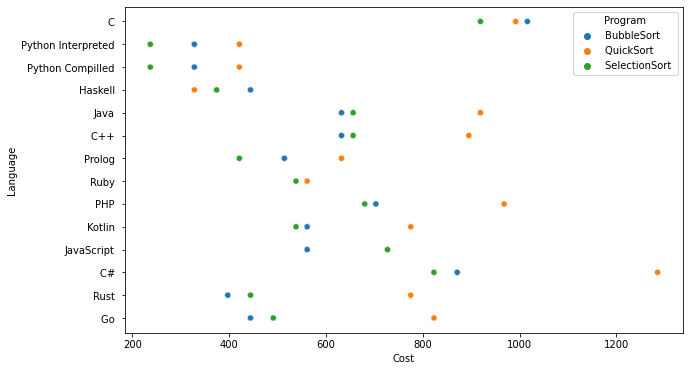

In [2]:
# estatísticas básicas
import seaborn as sea
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


file_name = '../measurements.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".")
for col in ["Time", "Memory", "Temperature", "Package", "Core", "GPU","Cost"]:
    plt.figure(figsize=(10,6))
    sea.scatterplot(data=df,hue='Program',y='Language', x=col)

# estatísticas básicas (descritivas)
# summary stats
print("Stats")
print("Number of rows: ", len(df.index))
print(df.describe())

In [3]:
df = df.drop(['GPU', 'Core','DRAM'], axis=1)

In [4]:
#Outliers treatment
#NOTE: This will remove 14*3*5*3*2 entries (14 languages, 3 sorting algorithms, 5 PowerLimit, 3 Sizes and 2 cases - best and worst executions)

# Agrupar o DataFrame por colunas "Language" e "Program"
grouped = df.groupby(['Language', 'Program', 'PowerLimit', 'Size'])

# Inicializar um DataFrame vazio para armazenar o resultado
df_removed_entries = pd.DataFrame()

# Iterar sobre cada grupo
for group_name, group_df in grouped:
    
    # Identificar o índice da melhor (menor tempo) e pior (maior tempo) entrada no grupo
    best_entry_index = group_df['Time'].idxmin()
    worst_entry_index = group_df['Time'].idxmax()
    if(best_entry_index==worst_entry_index):
        worst_entry_index+=1
    # Remover as linhas com base nos índices encontrados e adicionar ao DataFrame resultante 
    group_df = group_df.drop([best_entry_index, worst_entry_index])
    
    # Concatenar o DataFrame do grupo com o DataFrame resultante
    df_removed_entries = pd.concat([df_removed_entries, group_df])

df = df_removed_entries.copy()
# Imprimir o DataFrame resultante
print("Number of rows: ", len(df.index))
print(df)

Number of rows:  30240
      Language         Program  PowerLimit  Size  Cost   Package  Time   
0           C      BubbleSort            5  1000  1016  0.030090     9  \
2           C      BubbleSort            5  1000  1016  0.034790     9   
3           C      BubbleSort            5  1000  1016  0.039490    10   
4           C      BubbleSort            5  1000  1016  0.031921     9   
5           C      BubbleSort            5  1000  1016  0.038147     9   
...        ...             ...         ...   ...   ...       ...   ...   
31345    Rust   SelectionSort         1000  5000   444  0.167053    19   
31346    Rust   SelectionSort         1000  5000   444  0.172302    20   
31347    Rust   SelectionSort         1000  5000   444  0.111938    45   
31348    Rust   SelectionSort         1000  5000   444  0.180603    19   
31349    Rust   SelectionSort         1000  5000   444  0.117249    50   

       Temperature  Memory  
0             45.3     904  
2             45.0     900  
3

In [5]:
#Guardar medias para csv
grouped_table = df[(df['Size'] == 5000)&(df['PowerLimit'] == 1000) &(df['Program'] =='QuickSort ')]
grouped_table = grouped_table.drop('Size', axis=1)
grouped_table = grouped_table.drop('PowerLimit', axis=1)
grouped_table = grouped_table.drop('Program', axis=1)
grouped_table = grouped_table.groupby(['Language']).mean()
grouped_table.to_csv('filteredData.csv')

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


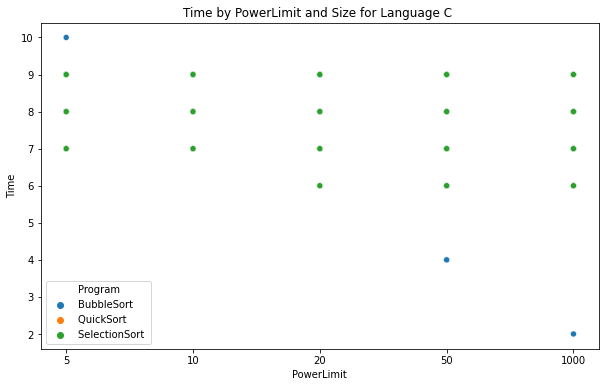

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


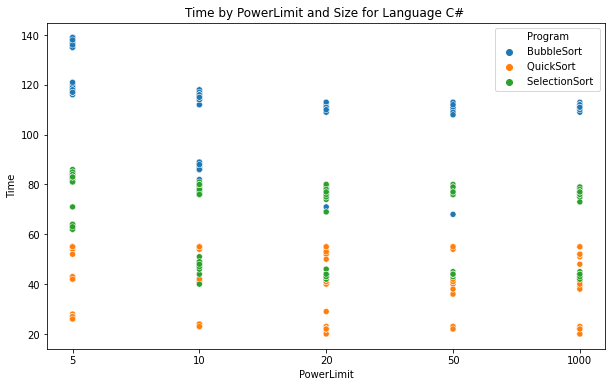

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


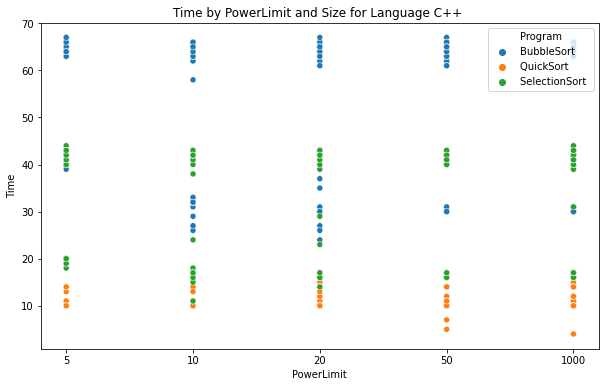

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


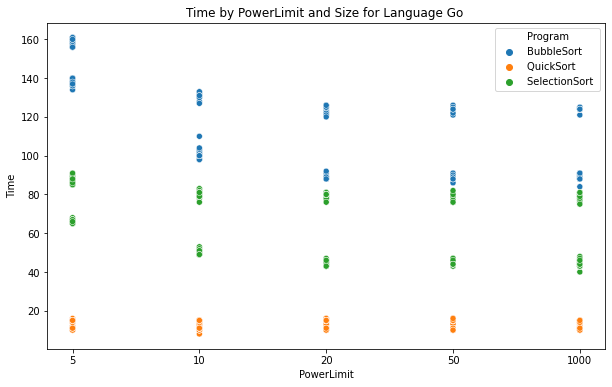

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


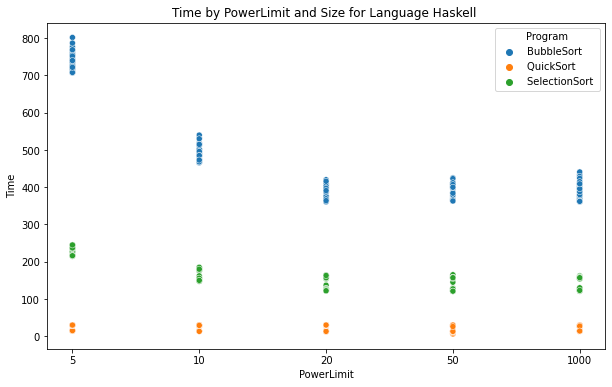

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


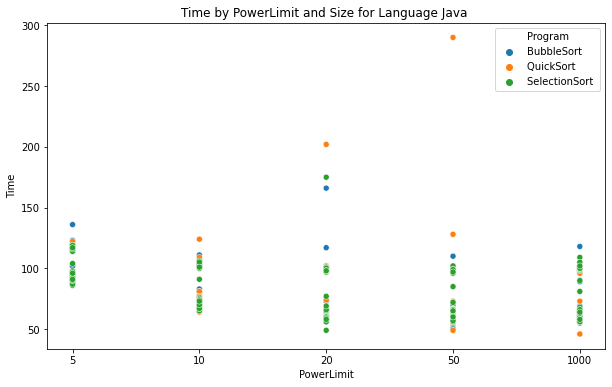

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


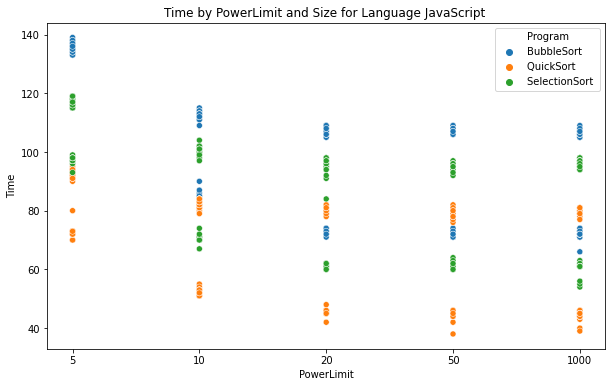

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


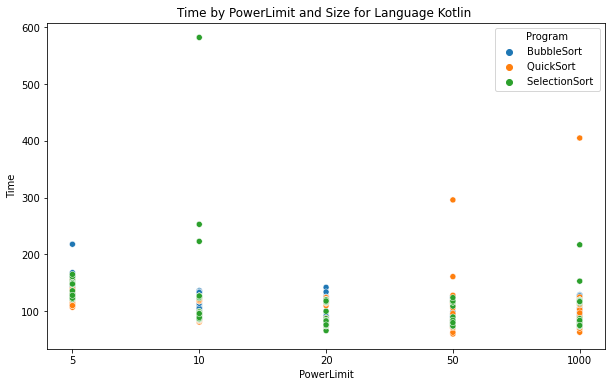

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


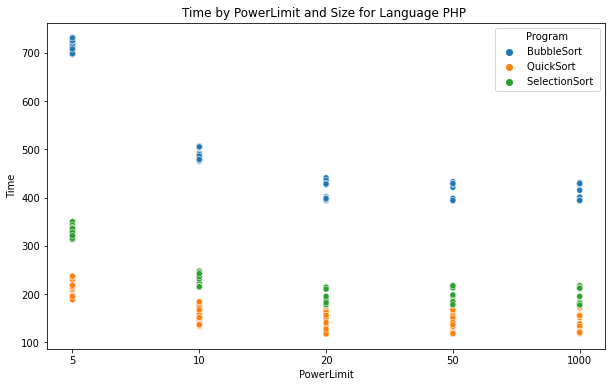

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


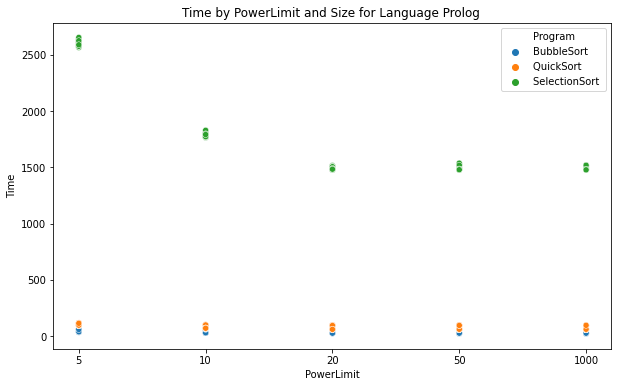

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


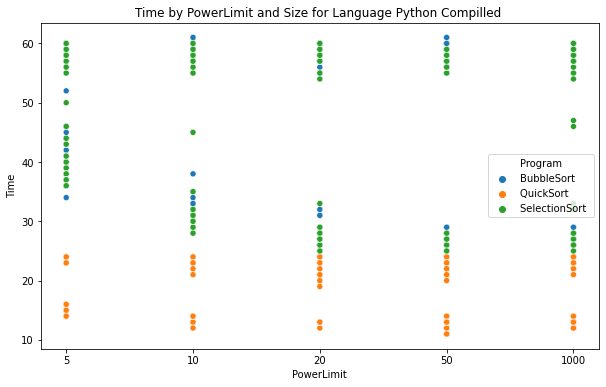

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


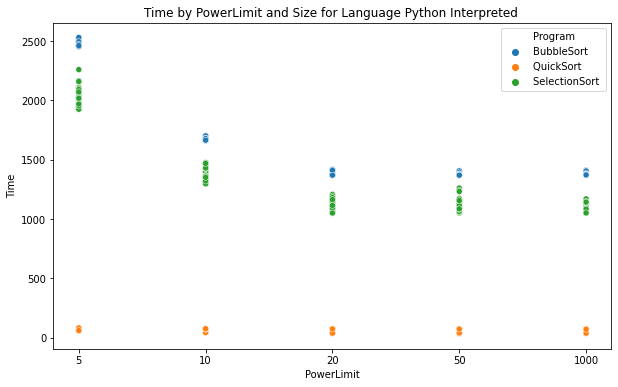

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


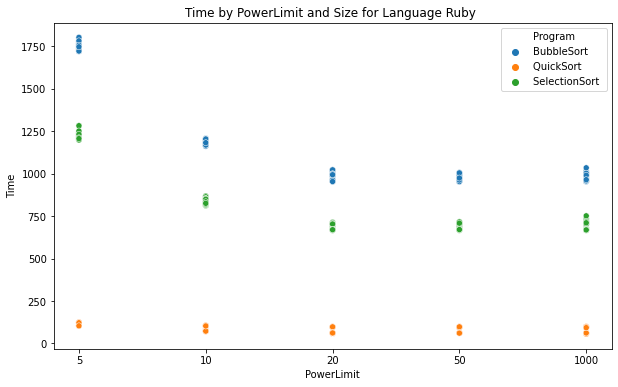

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


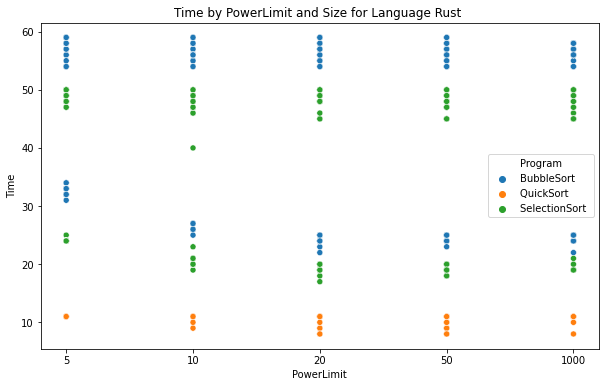

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


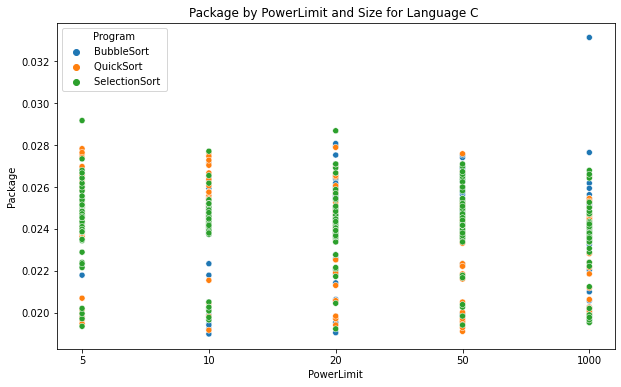

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


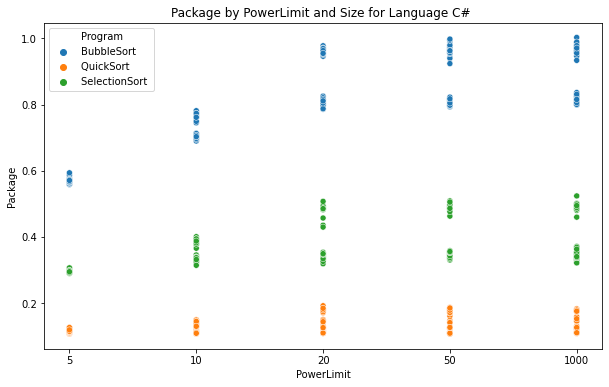

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


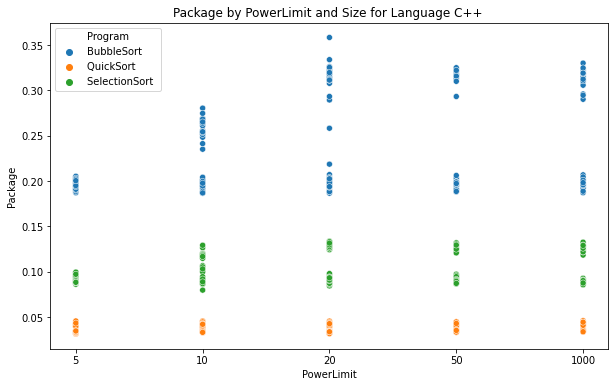

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


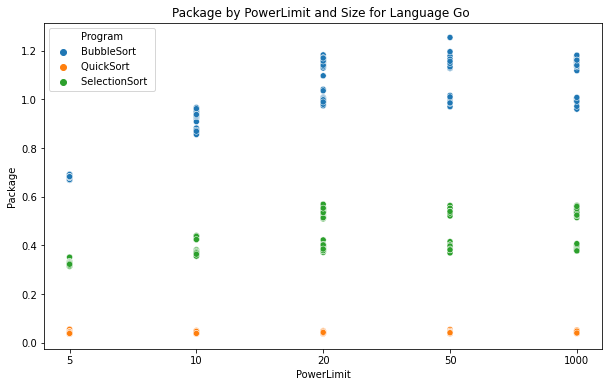

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


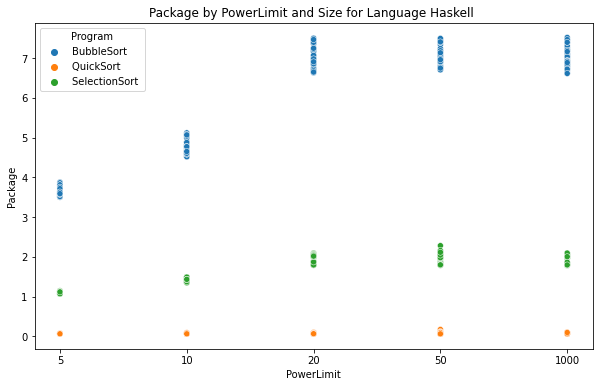

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


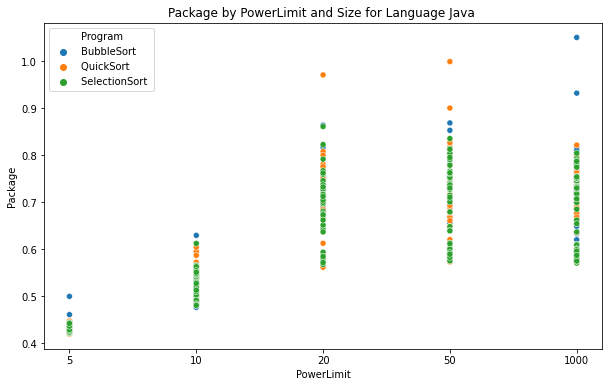

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


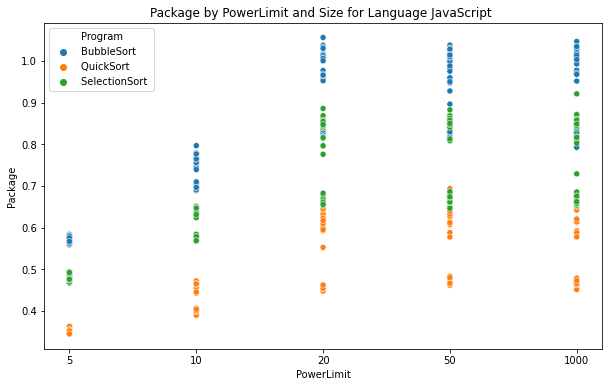

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


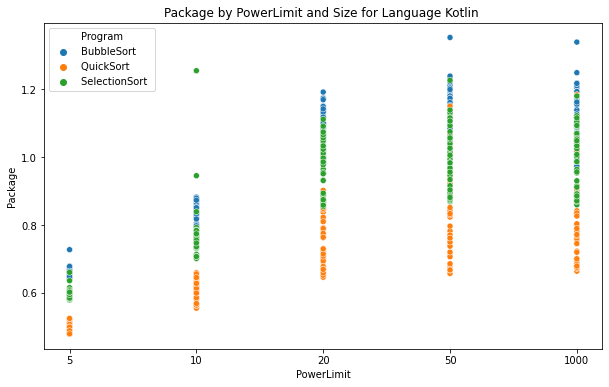

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


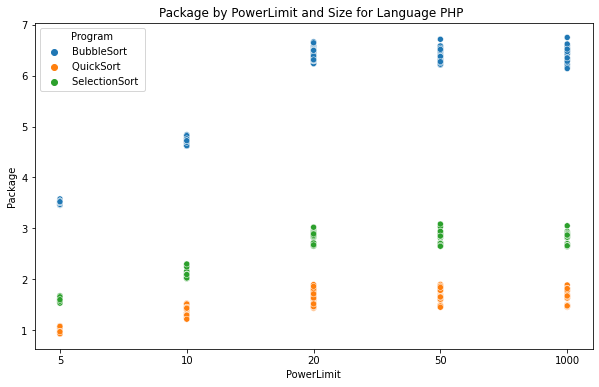

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


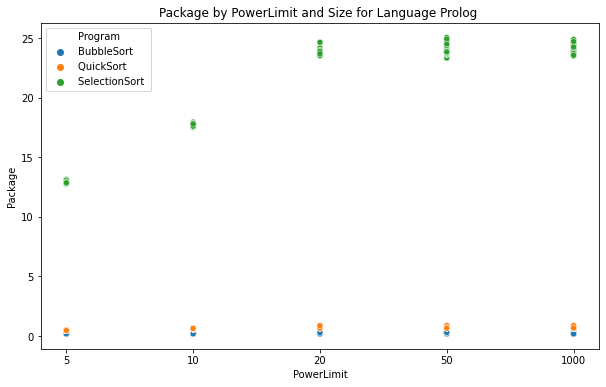

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


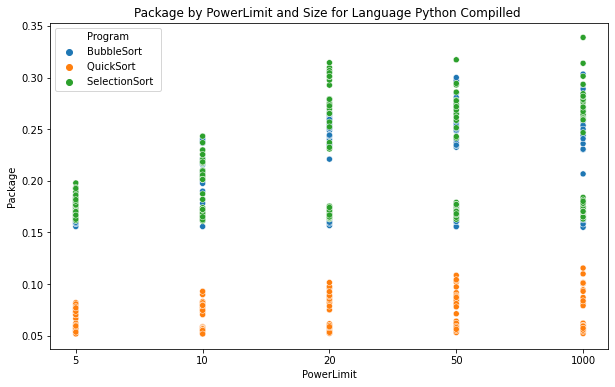

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


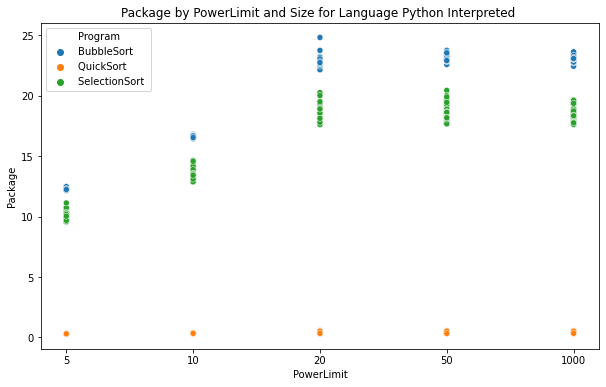

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


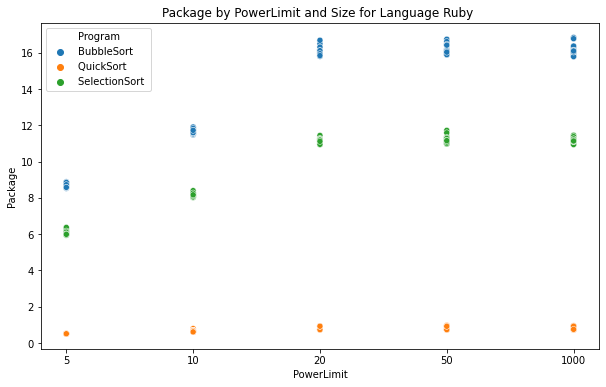

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


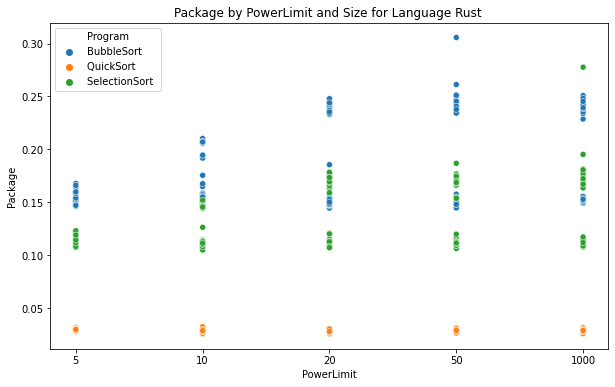

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


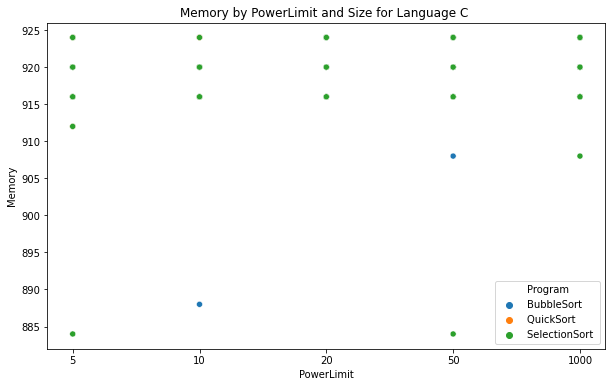

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


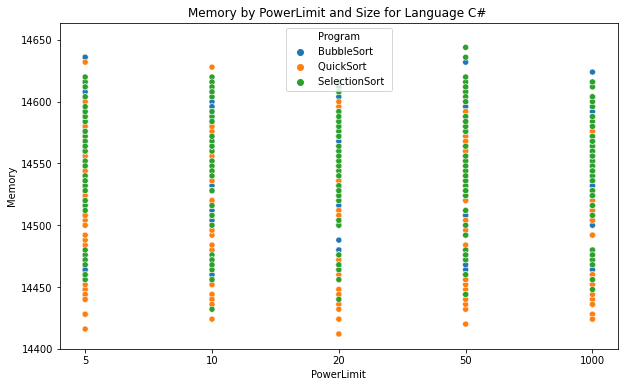

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


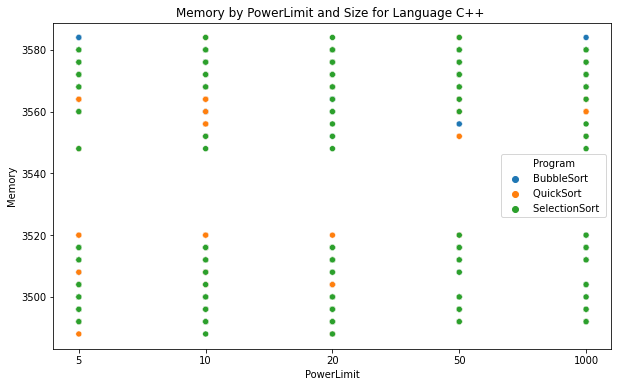

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


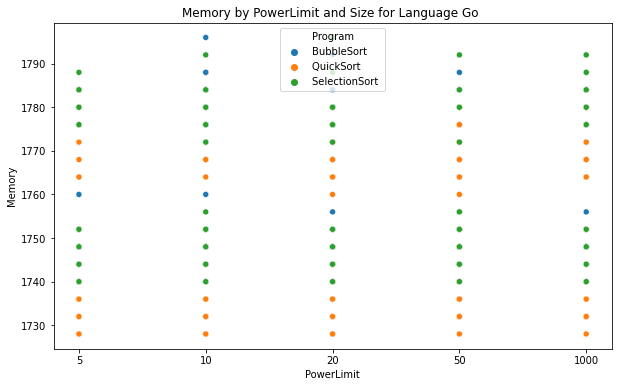

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


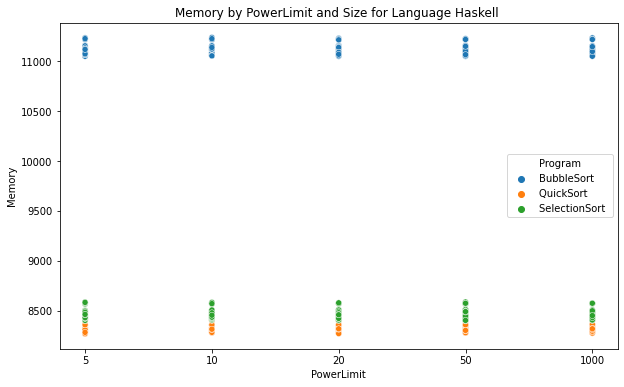

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


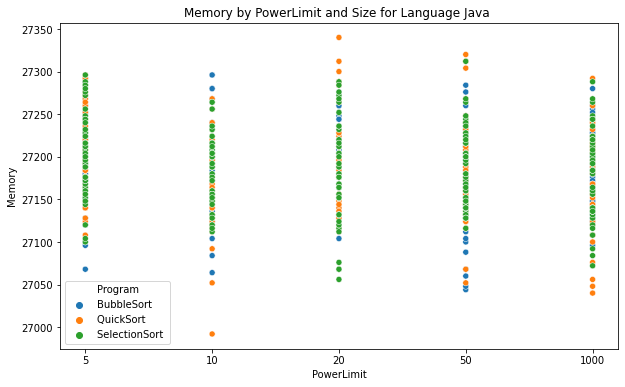

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


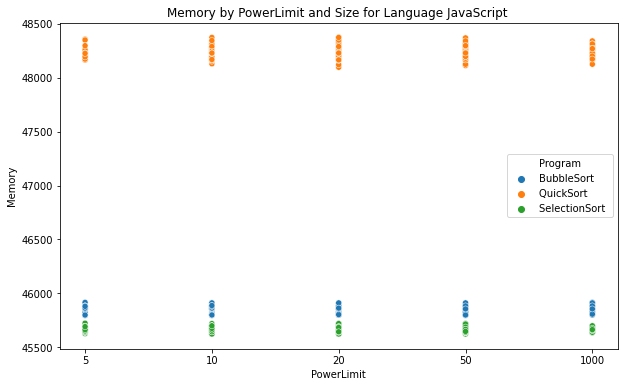

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


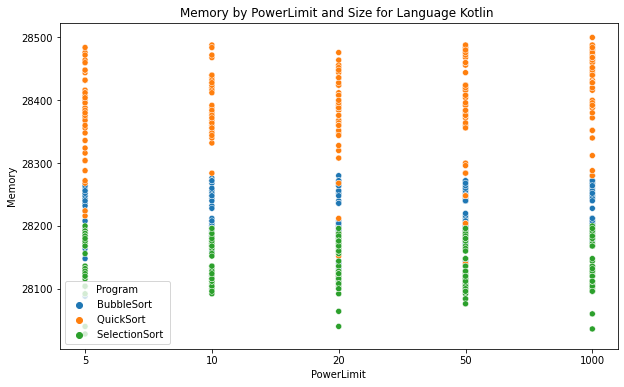

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


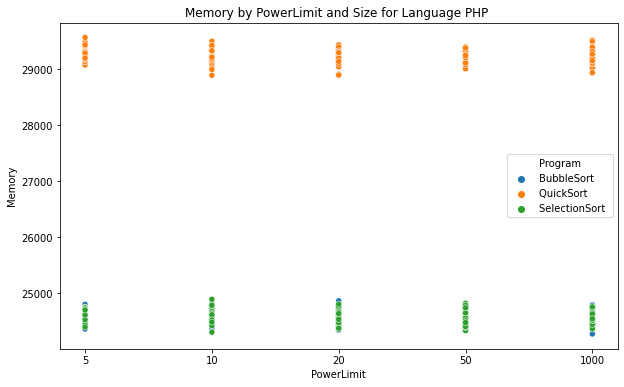

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


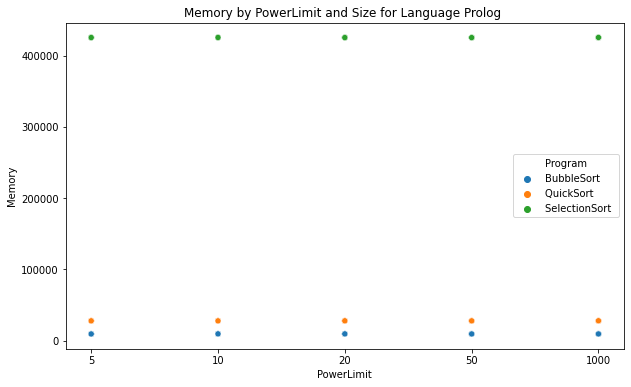

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


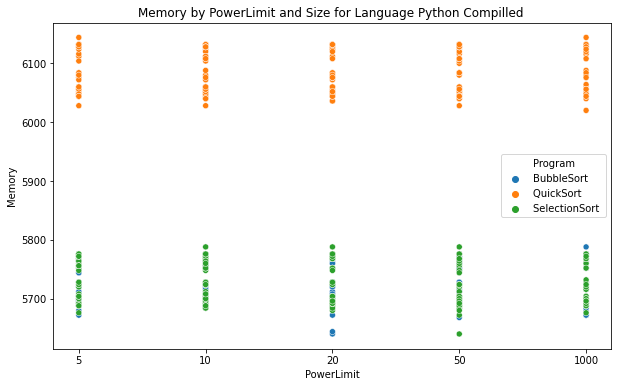

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


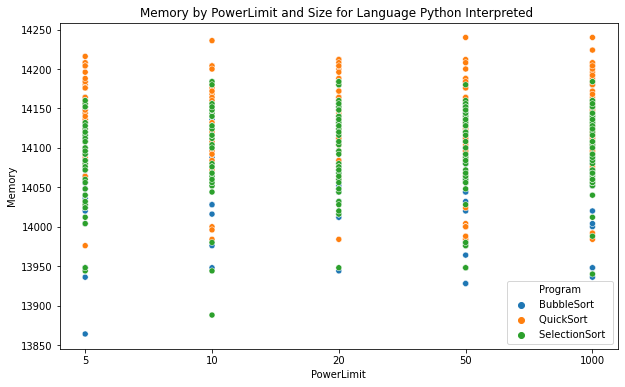

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


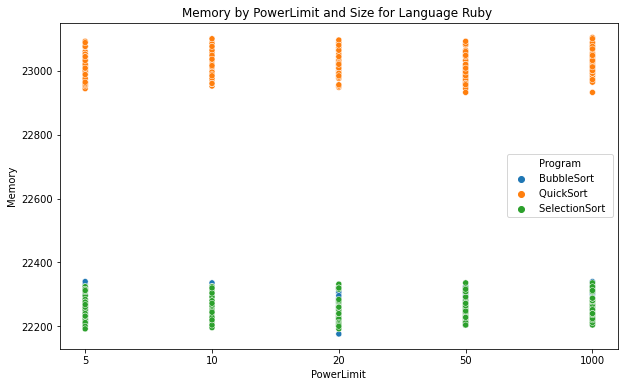

C:\Users\utilizador\AppData\Local\Temp\ipykernel_16608\2259426221.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)


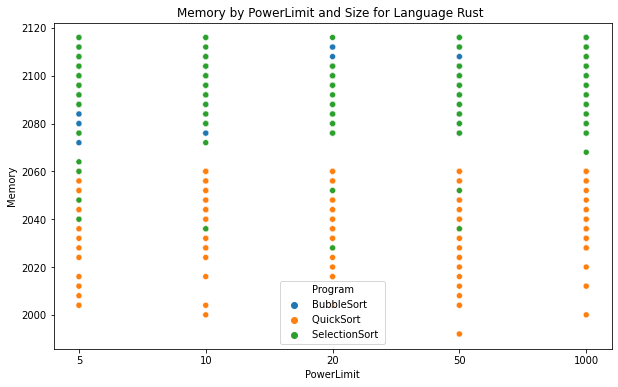

In [6]:
import matplotlib.pyplot as plt
import seaborn as sea

# Columns for comparison
columns = ["Time", "Package", "Memory"]
group_column = "PowerLimit"  # Specify the column to group by

# Iterate over the columns
for col in columns:
    languages = df['Language'].unique()
    for language in languages:
        plt.figure(figsize=(10, 6))
        
        data_subset = df[(df['Language'] == language) & (df['Size'] == 5000)]
        data_subset['PowerLimit'] = data_subset['PowerLimit'].astype(str)
        
        ax = sea.scatterplot(data=data_subset, x=group_column, y=col, hue='Program')  # Add size='Size' parameter
        
        plt.xlabel(group_column)
        plt.ylabel(col)
        plt.title(f'{col} by {group_column} and Size for Language {language}')
        
        plt.legend(title='Program')
        plt.show()

Conclusões a retirar-> O quickSort demonstra ser melhor em tempo e package. Em algumas excessões o selection sort é melhor mas vamos focar-nos na analise dos resultados do quickSort

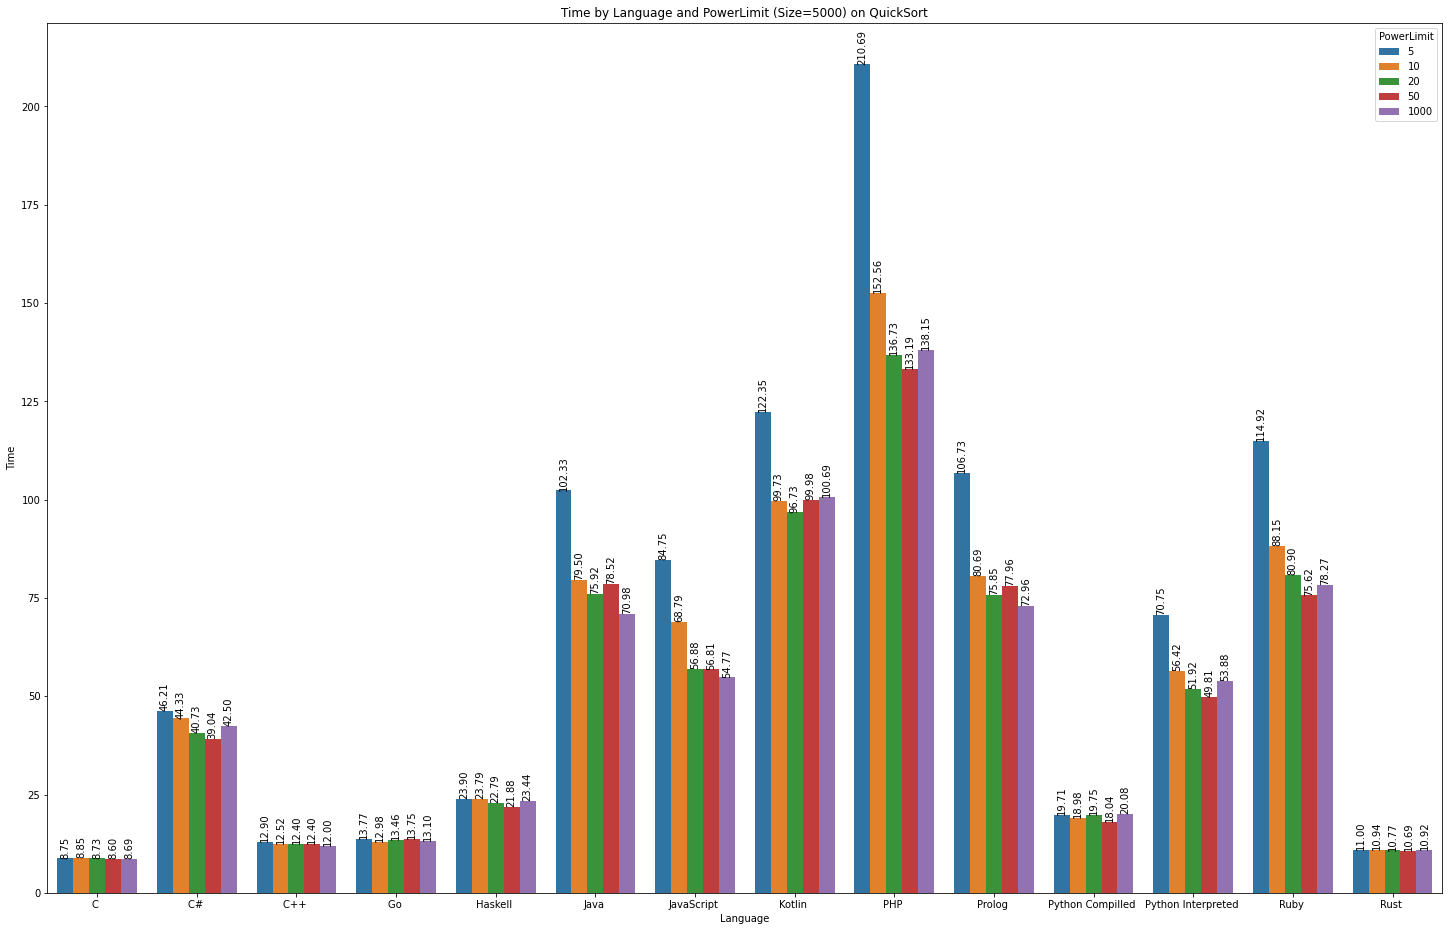

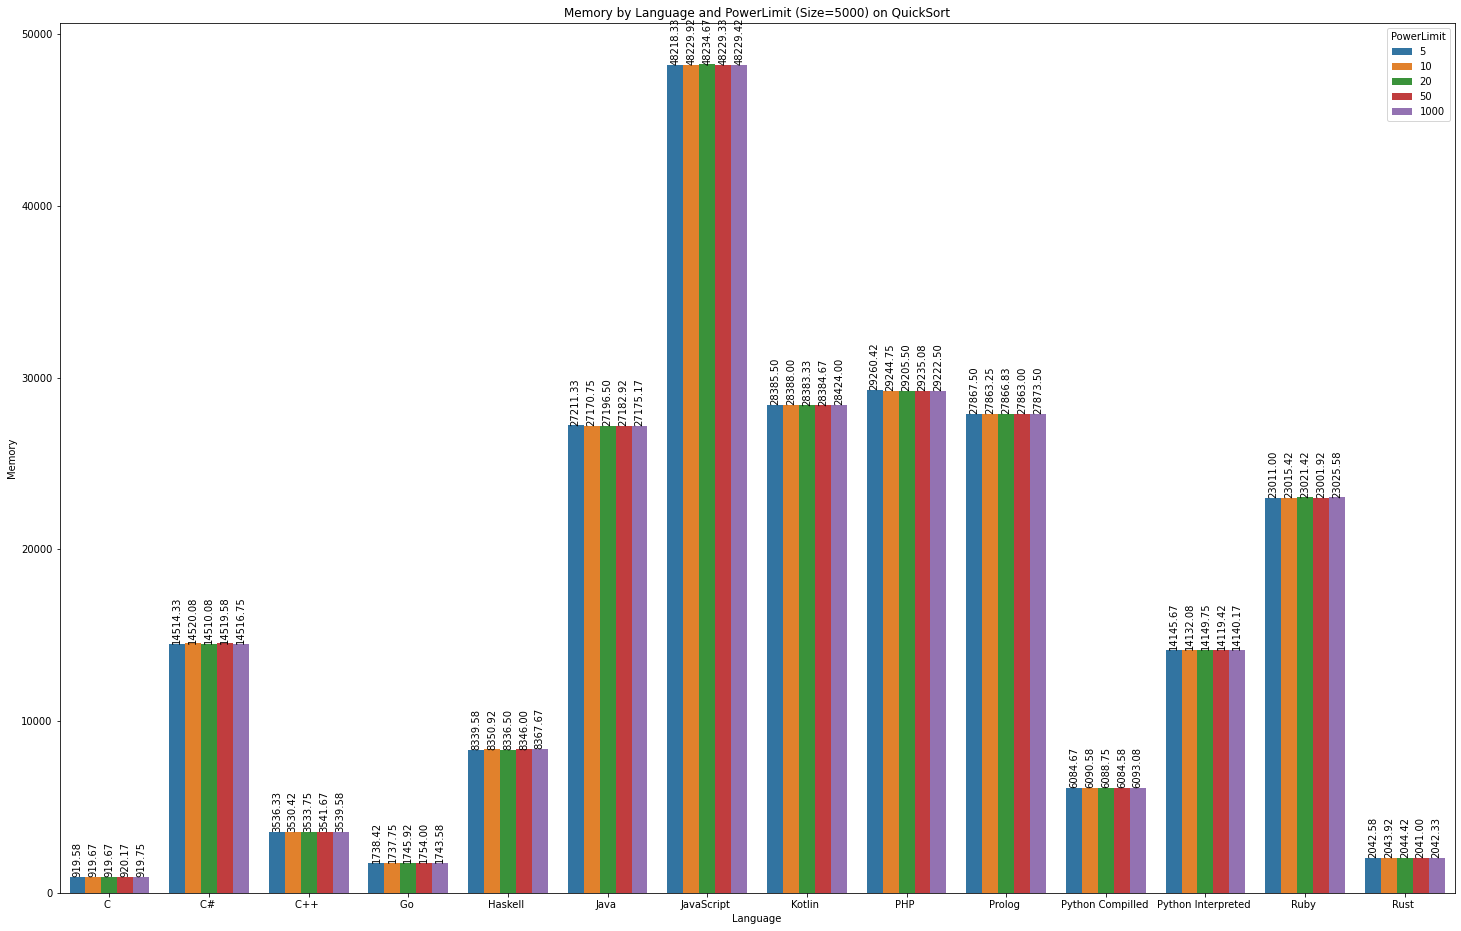

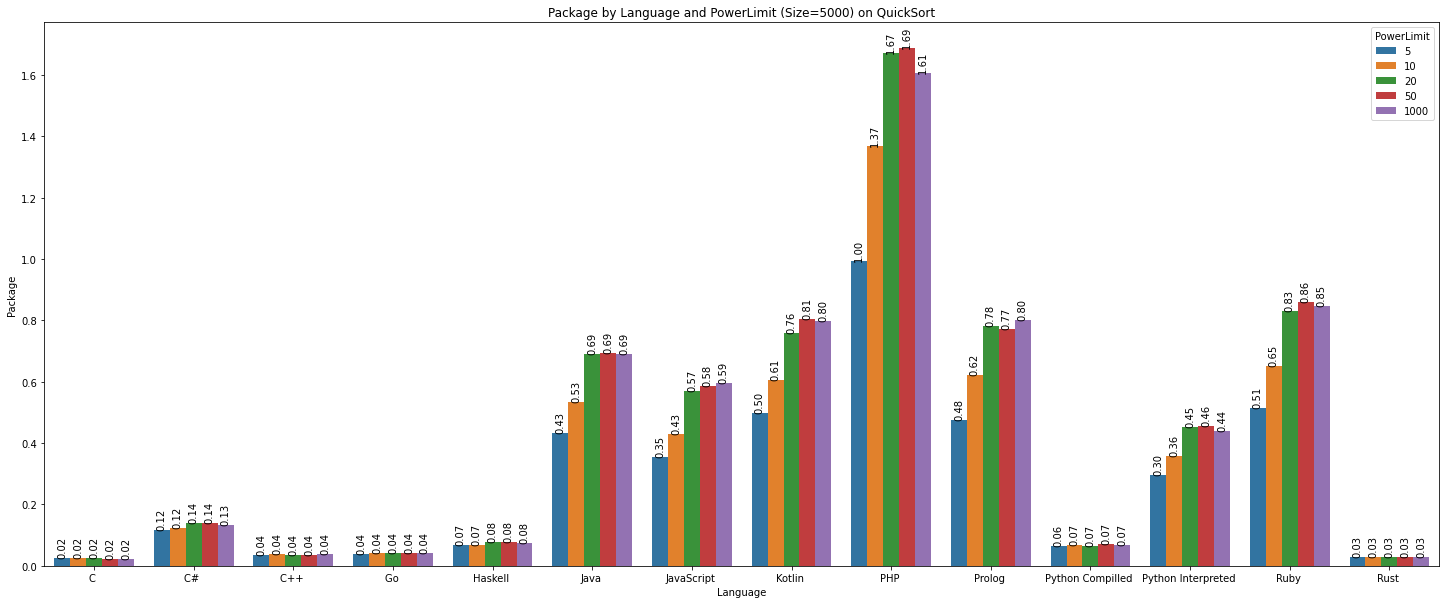

In [7]:
import matplotlib.pyplot as plt
import seaborn as sea

size = 5000

for col in ["Time", "Memory", "Package"]:
    if col in ["Time", "Memory"]:
        plt.figure(figsize=(25, 16))  # Aumenta a altura do gráfico
    else:
        plt.figure(figsize=(25, 10))  # Tamanho padrão
    
    data_subset = df[(df['Size'] == size)&(df['Program'] == 'QuickSort ')]

    hue_labels = [val for val in data_subset['PowerLimit']]
    ax = sea.barplot(data=data_subset, x='Language', y=col, hue=hue_labels, errorbar=None)
    plt.xlabel('Language')
    plt.ylabel(col)
    plt.title(f'{col} by Language and PowerLimit (Size={size}) on QuickSort')
    plt.legend(title='PowerLimit')

    # Add the measured values on top of each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        
        ax.text(x + width / 2, y + height, format(height, '.2f'),
                ha='center', va='bottom', rotation='vertical')

    plt.show()


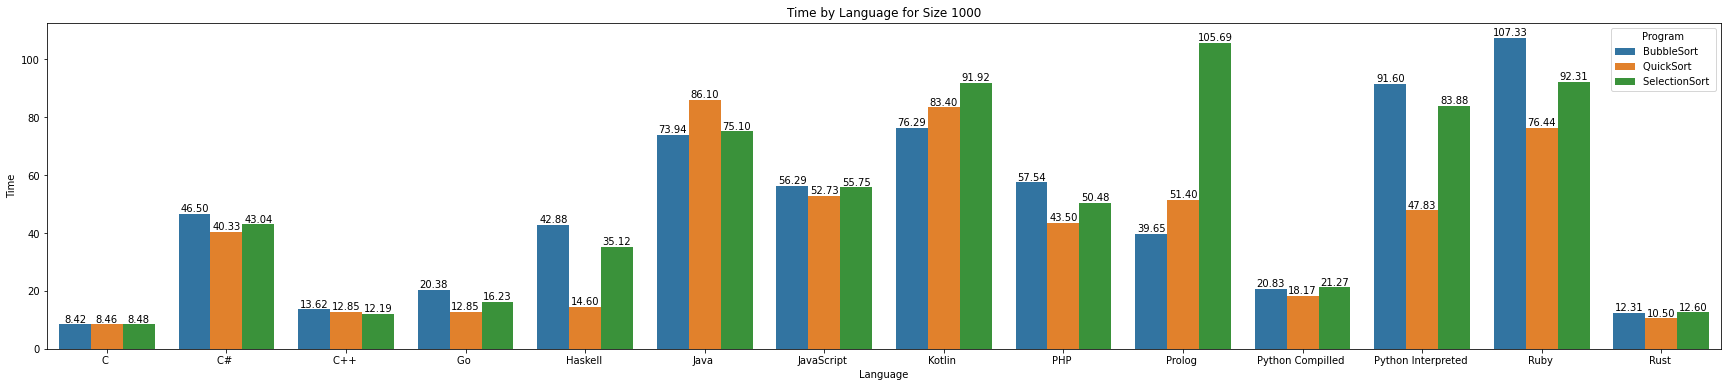

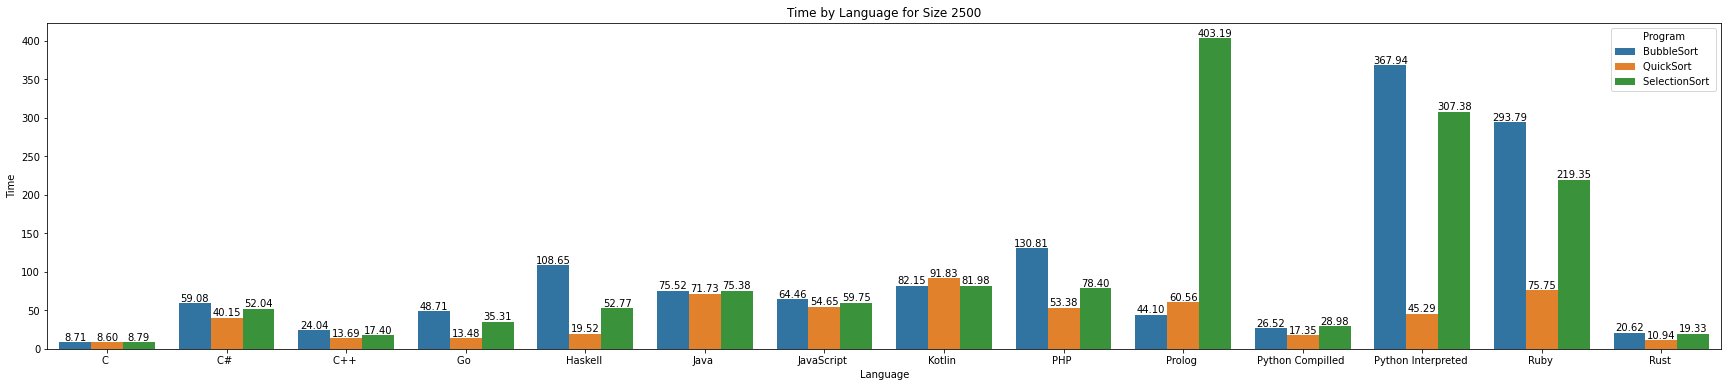

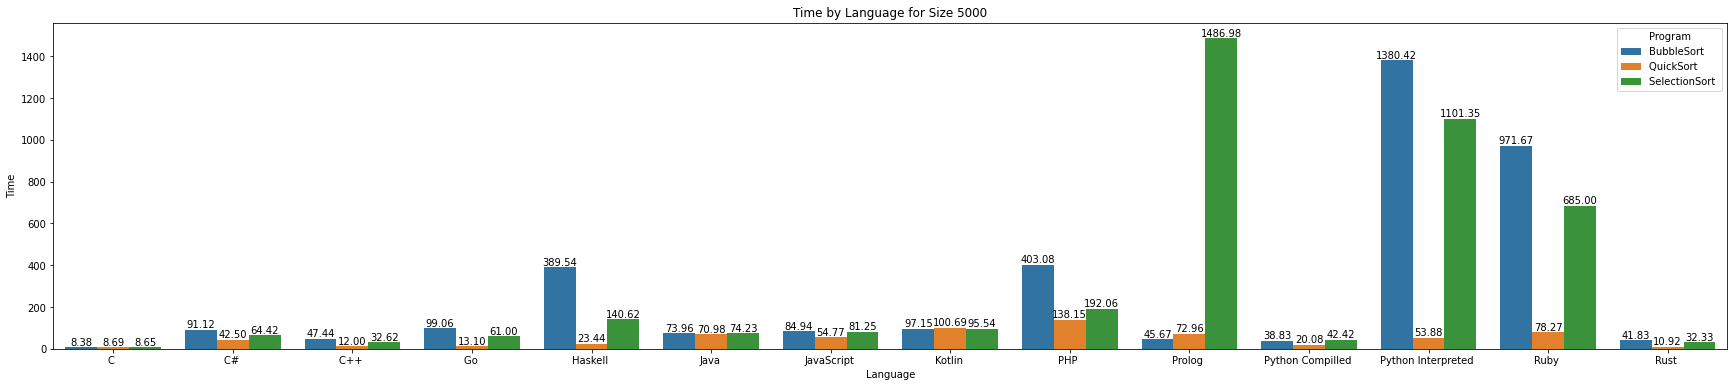

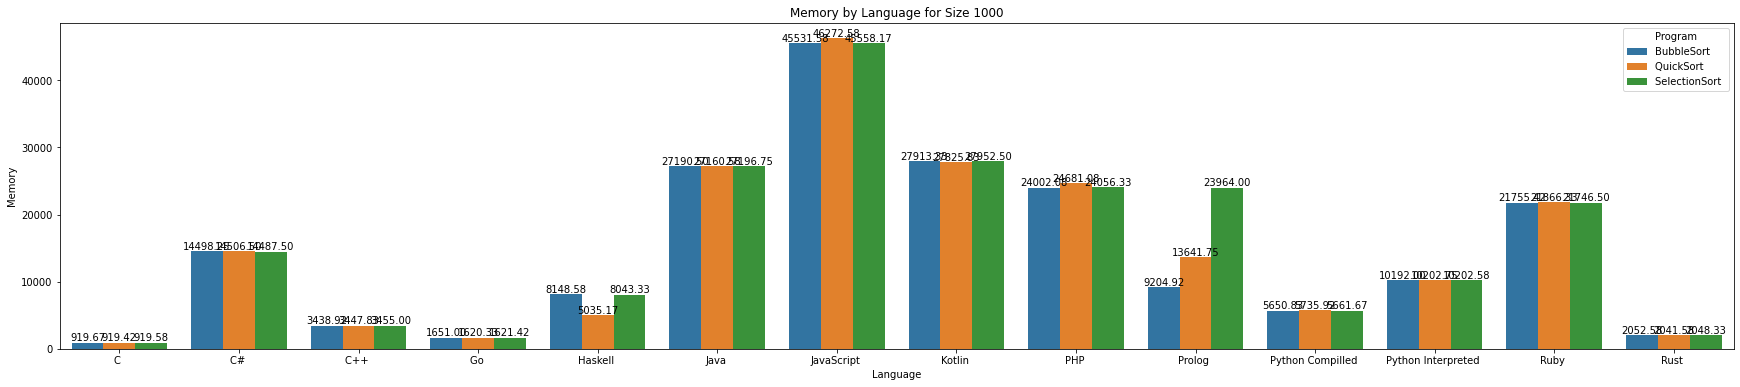

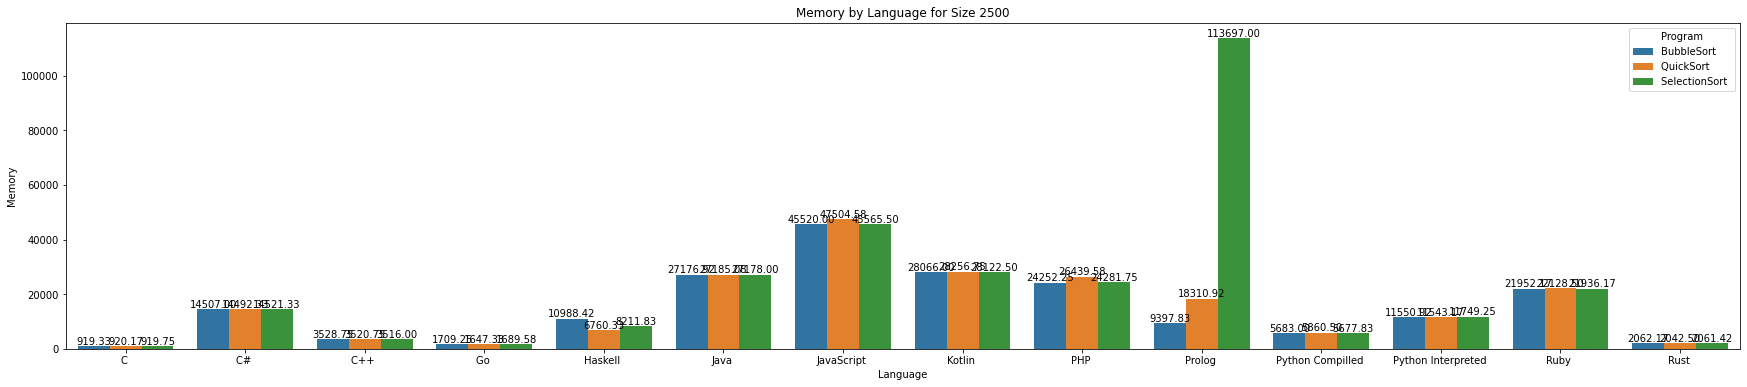

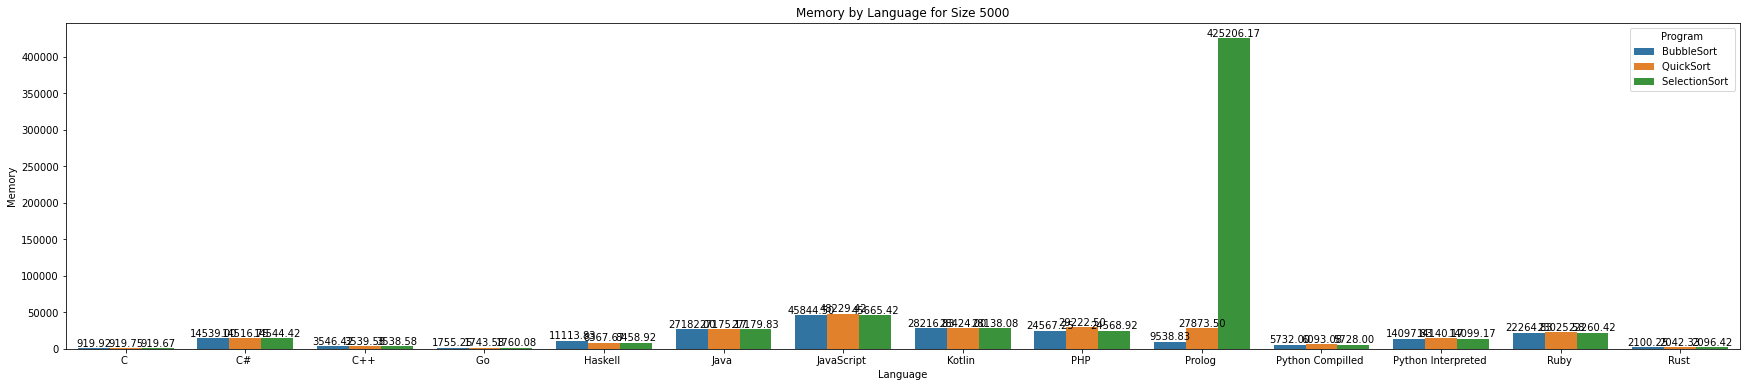

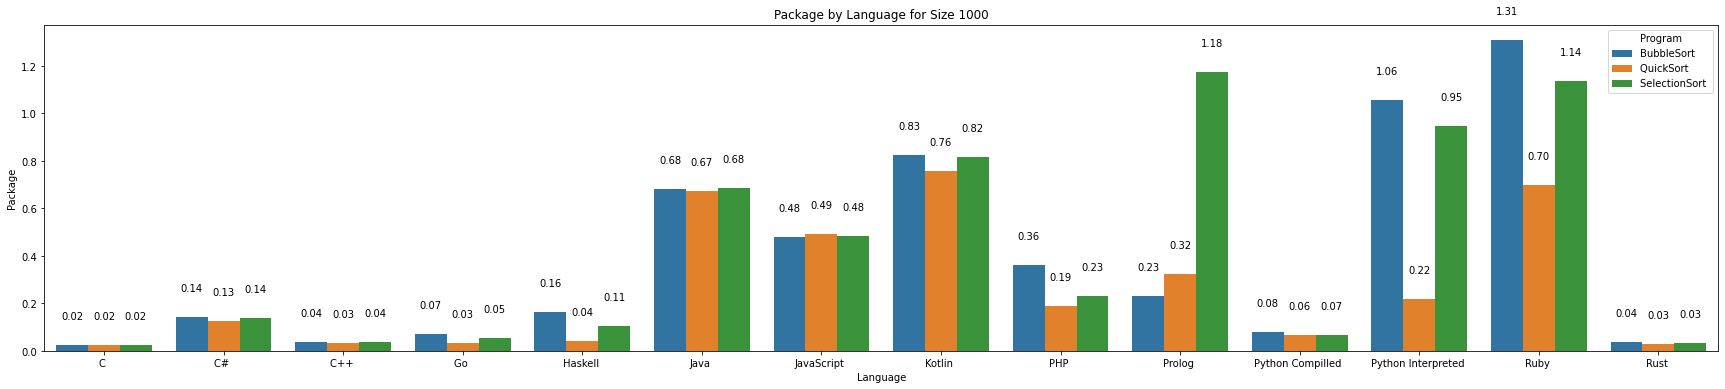

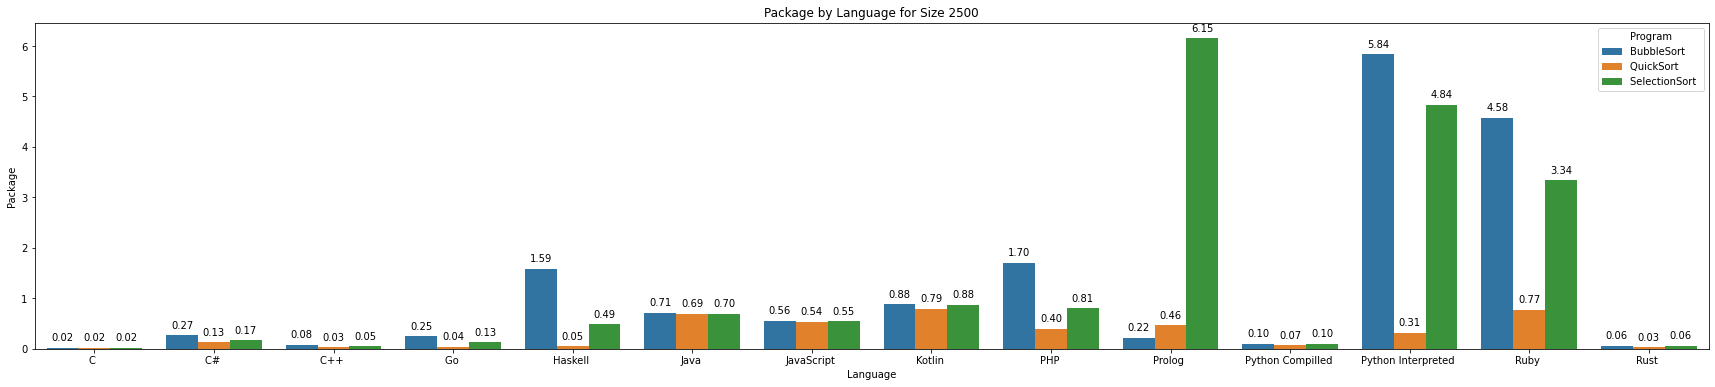

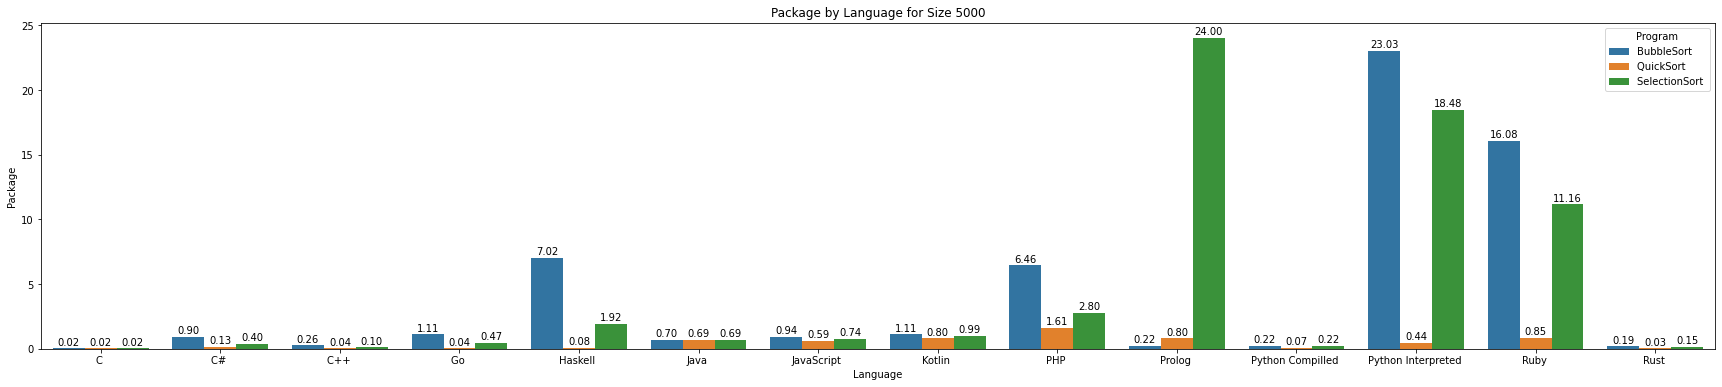

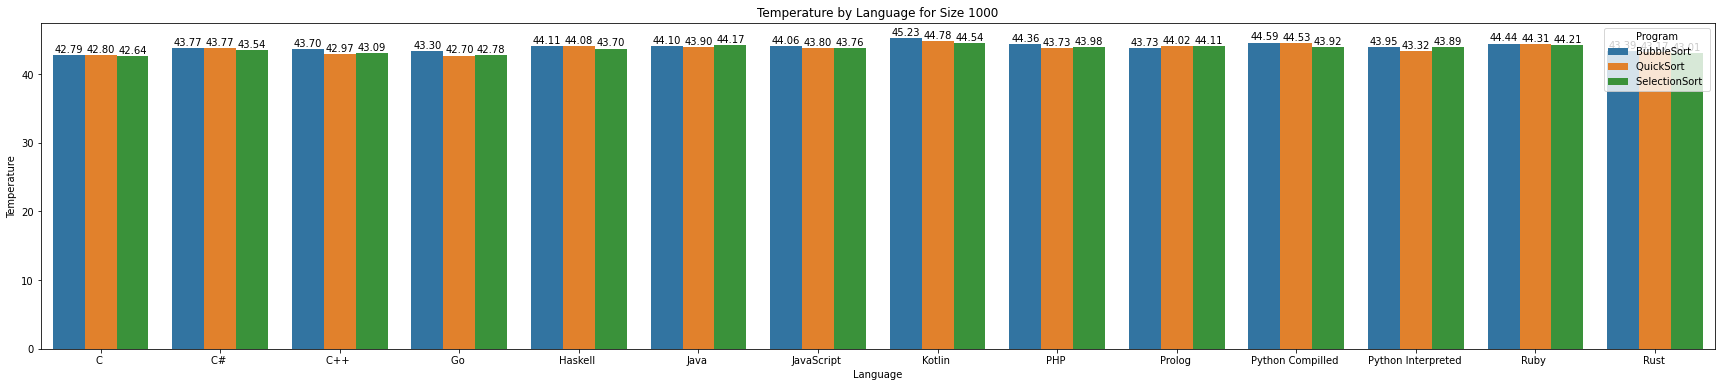

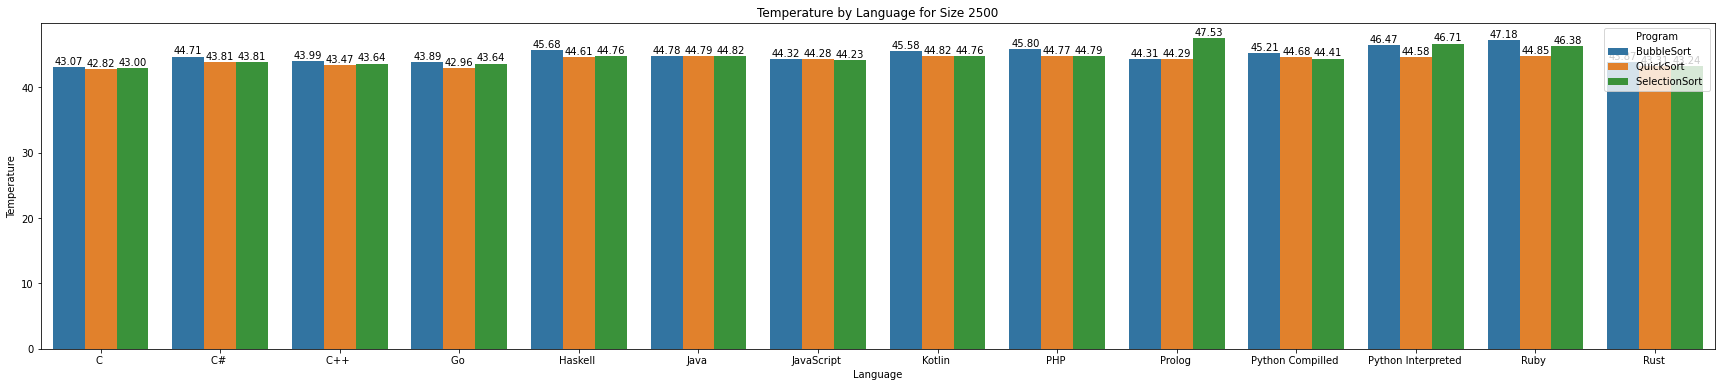

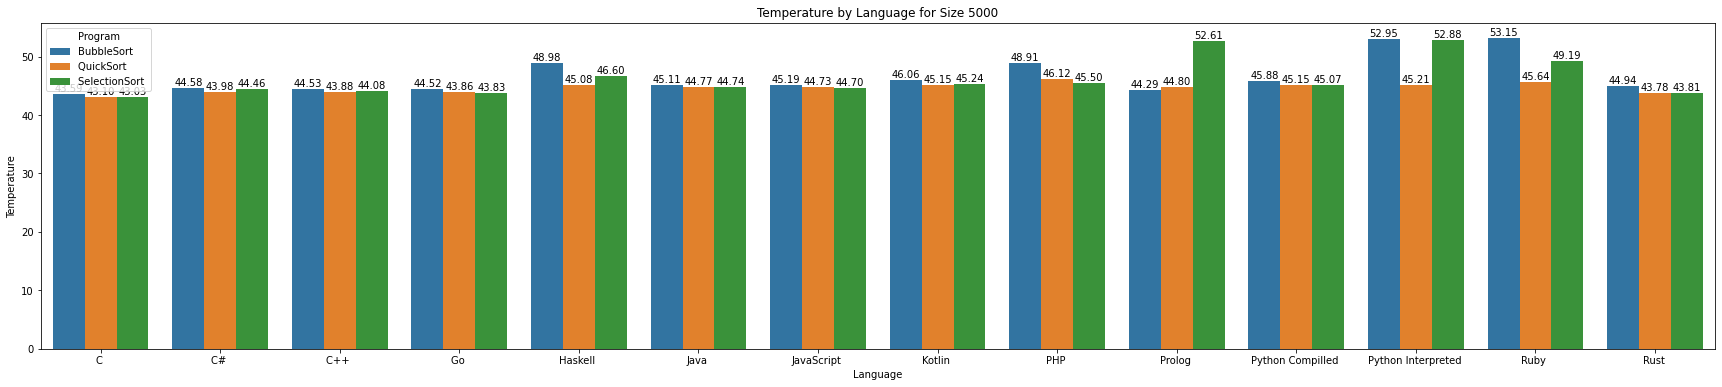

In [8]:
import matplotlib.pyplot as plt
import seaborn as sea

# Criar um gráfico de barras agrupadas na orientação vertical para cada valor único da coluna "Size"
for col in ["Time", "Memory", "Package","Temperature"]:
    for size in df['Size'].unique():
        plt.figure(figsize=(30, 6))
        subset = df[(df['Size'] == size) &(df['PowerLimit'] == 1000)]
        ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
        plt.xlabel('Language')
        plt.ylabel(col)
        plt.title(f'{col} by Language for Size {size}')
        plt.legend(title='Program')
        #ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas
    
        # Adicionar os valores medidos na vertical em cima de cada barra
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
                    ha='center', va='bottom', rotation='horizontal')
    
        plt.show()


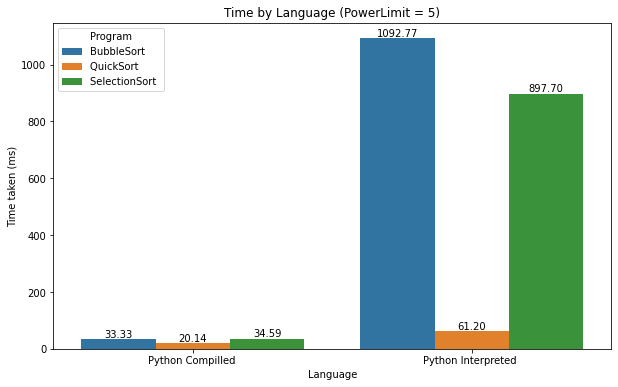

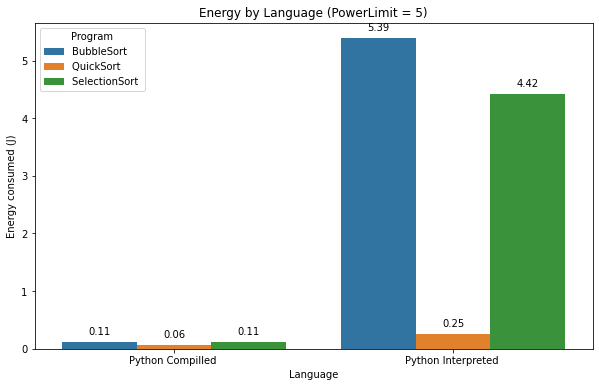

In [26]:
import matplotlib.pyplot as plt
import seaborn as sea


# Criar um gráfico de barras agrupadas na orientação vertical para cada valor único da coluna "Size"
for col in ["Time","Package"]:
    plt.figure(figsize=(10, 6))
    subset = df.loc[(df['PowerLimit'] == 5) & ((df['Language'] == "Python Compilled ") | (df['Language'] == "Python Interpreted ")), :]
    ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
    plt.xlabel('Language')
    if col == "Package":
        plt.ylabel("Energy consumed (J)")
        plt.title("Energy by Language (PowerLimit = 5)")

    else:
        plt.ylabel("Time taken (ms)")
        plt.title("Time by Language (PowerLimit = 5)")

    plt.legend(title='Program', loc='upper left')
    #ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas

    # Adicionar os valores medidos na vertical em cima de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
                ha='center', va='bottom', rotation='horizontal')

    plt.show()


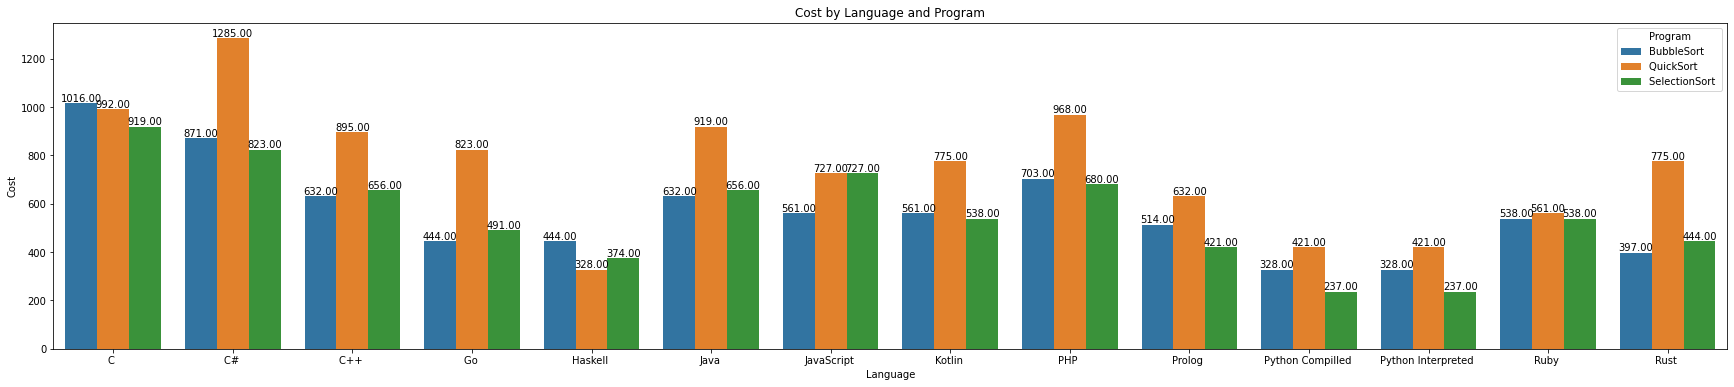

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sea

# Valor da coluna para comparação
col = "Cost"

plt.figure(figsize=(30, 6))
subset = df
ax = sea.barplot(data=subset, x='Language', y=col, hue='Program', errorbar=None)
plt.xlabel('Language')
plt.ylabel(col)
plt.title(f'{col} by Language and Program')
plt.legend(title='Program')
#ax.set_xticklabels(df['Language'].unique(), rotation=90)  # Definir os rótulos do eixo x como as línguas
# Adicionar os valores medidos na vertical em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, format(height, '.2f'),
            ha='center', va='bottom', rotation='horizontal')
plt.show()

<Axes: >

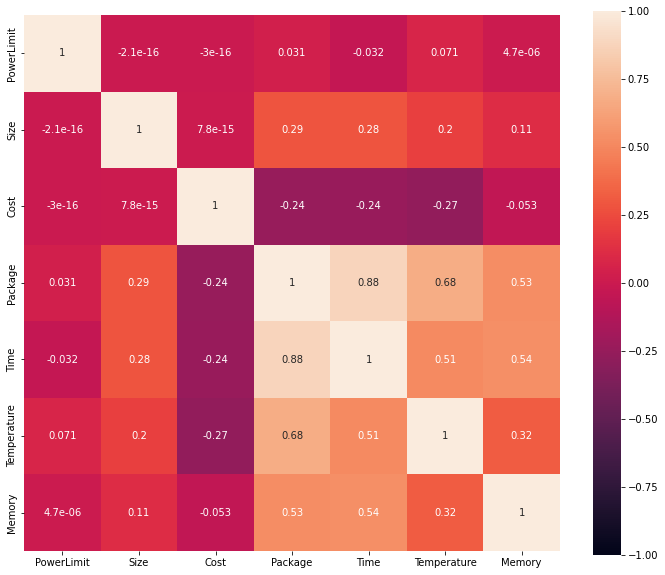

In [ ]:
import seaborn as sns

new_df = df.drop(["Program", "Language"], axis=1)
corr_matrix = new_df.corr()

f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

<Axes: xlabel='Time', ylabel='Language'>

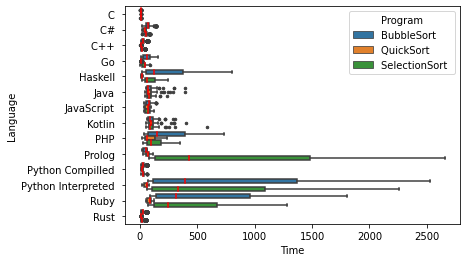

In [ ]:
sea.boxplot(data=df,hue='Program',x='Time',y='Language',medianprops={"color":"red"},
            flierprops={"marker": "."},)

In [ ]:
filtered_data = df[(df["PowerLimit"] == 5)]  
average_time = filtered_data.groupby("Program")["Package"].mean() 
average_time = average_time.sort_values(ascending=True) 

filtered_data2 = df[(df["PowerLimit"] == 1000)]
average_time2 = filtered_data2.groupby("Program")["Package"].mean() 
average_time2 = average_time2.sort_values(ascending=True) 

gain_loss = ((average_time - average_time2) / average_time2) * 100

gain_loss_formatted = gain_loss.map("{:.2f}%".format)

print(average_time)
print(average_time2)
print(gain_loss_formatted)


Program
QuickSort         0.228860
BubbleSort        1.076748
SelectionSort     1.157228
Name: Package, dtype: float64
Program
QuickSort         0.339238
BubbleSort        1.919835
SelectionSort     2.056208
Name: Package, dtype: float64
Program
QuickSort         -32.54%
BubbleSort        -43.91%
SelectionSort     -43.72%
Name: Package, dtype: object


In [ ]:
feature = "Package"

filtered_data = df[(df["PowerLimit"] == 5) & (df["Program"] == "QuickSort ")]  
average_time = filtered_data.groupby("Language")[feature].mean() 
average_time = average_time.sort_values(ascending=True) 

filtered_data2 = df[(df["PowerLimit"] == 1000) & (df["Program"] == "QuickSort ")]  
average_time2 = filtered_data2.groupby("Language")[feature].mean() 
average_time2 = average_time2.sort_values(ascending=True) 

gain_loss = ((average_time - average_time2) / average_time2) * 100

gain_loss_formatted = gain_loss.map("{:.2f}%".format)

print(average_time)
print(average_time2)
print(gain_loss_formatted)


Language
C                      0.025323
Rust                   0.029591
Go                     0.036171
C++                    0.036533
Haskell                0.056795
Python Compilled       0.063902
C#                     0.114063
Python Interpreted     0.249122
JavaScript             0.332604
Prolog                 0.360756
Java                   0.451482
PHP                    0.477728
Ruby                   0.482808
Kotlin                 0.487160
Name: Package, dtype: float64
Language
C                      0.024089
Rust                   0.028685
C++                    0.034924
Go                     0.036809
Haskell                0.056500
Python Compilled       0.067850
C#                     0.131198
Python Interpreted     0.324341
Prolog                 0.528942
JavaScript             0.541939
Java                   0.686531
PHP                    0.731745
Ruby                   0.772871
Kotlin                 0.782902
Name: Package, dtype: float64
Language
C                